<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Inverting-log-signatures" data-toc-modified-id="Inverting-log-signatures-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Inverting log-signatures</a></span><ul class="toc-item"><li><span><a href="#Generate-path" data-toc-modified-id="Generate-path-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Generate path</a></span></li><li><span><a href="#Invert-log-signature" data-toc-modified-id="Invert-log-signature-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Invert log-signature</a></span></li></ul></li></ul></div>

# Inverting log-signatures

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from esig import tosig

import base
import logsig_inversion
from utils.leadlag import leadlag
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

## Generate path

In [2]:
# Pip size
pip = 0.01

# Number of pips for search space
n_pips = 10

# Number of points
n_points = 21

path = np.r_[0., pip * np.random.randint(-n_pips, n_pips, size=n_points - 1).cumsum()]

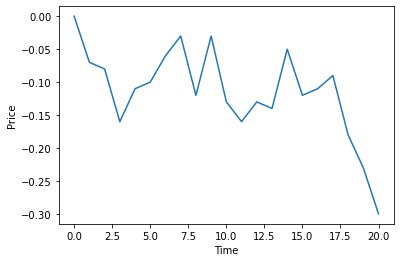

In [3]:
plt.plot(path)
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [4]:
# Compute log-signature

order = 4
leadlag_path = leadlag(path)
logsig = tosig.stream2logsig(leadlag_path, order)

print(f"Log-signature: {logsig}")

Log-signature: [-3.00000000e-01 -3.00000000e-01 -3.68000000e-02 -1.77600000e-03
 -1.36900000e-03  3.49666667e-05  1.00820000e-04  4.53066667e-05]


## Invert log-signature

In [5]:
n_iterations = 100
n_organisms = 1000
recovered_path, loss = logsig_inversion.train(logsig, order, n_iterations, n_organisms, n_points,
                                              pip, n_pips)

  0%|          | 0/100 [00:00<?, ?it/s]

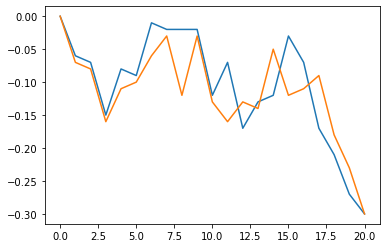

Real log-signature: [-3.00000000e-01 -3.00000000e-01 -3.68000000e-02 -1.77600000e-03
 -1.36900000e-03  3.49666667e-05  1.00820000e-04  4.53066667e-05]
Recovered log-signature: [-3.00000000e-01 -3.00000000e-01 -3.58000000e-02 -1.85700000e-03
 -1.46900000e-03  3.64333333e-05  1.01320000e-04  4.35433333e-05]


In [6]:
plt.plot(recovered_path)
plt.plot(path)
plt.show()
print(f"Real log-signature: {logsig}")
print(f"Recovered log-signature: {tosig.stream2logsig(leadlag(recovered_path), order)}")